<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning/blob/main/Bidirectional_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional Recurrent Neural Network (BiRNN)


A Bidirectional Recurrent Neural Network (BiRNN) is an extension of a traditional RNN that can improve performance on sequence classification problems. In standard RNNs, information only flows in one direction—from past to future. However, in many tasks (e.g., sentiment analysis, named entity recognition), context from both past and future is useful.

## Architecture
<img src="https://raw.githubusercontent.com/intel/BigDL-Tutorials/6b23c22b586fa72ef3aa585092516da7ca64ffa8/notebooks/neural_networks/tutorial_images/Bi-directional_RNN/Bi-directional_RNN.jpg" width="1000"/>


A BiRNN processes data in both forward and backward directions using two separate hidden layers. The outputs from both directions are then combined at each time step. This allows the network to have both backward and forward information about the sequence at every point.

### Structure
- **Forward layer**: Processes the sequence from time step \( t=1 \) to \( t=T \).
- **Backward layer**: Processes the sequence from time step \( t=T \) to \( t=1 \).
- The output at each time step is typically the concatenation (or sum) of the forward and backward hidden states:
  \[
  h_t = [\overrightarrow{h_t}; \overleftarrow{h_t}]
  \]

## Why Use BiRNN?
- In tasks like part-of-speech tagging or sentiment analysis, knowing the entire context (not just past inputs) can improve prediction.
- Bidirectional processing helps capture dependencies that a unidirectional RNN might miss.

## Applications
- **Text classification**
- **Speech recognition**
- **Machine translation**
- **Named entity recognition**

## Limitations
- Increased computational cost and memory usage.
- Cannot be used in real-time applications where future context is not available.

## Summary
Bidirectional RNNs enhance the learning ability of RNNs by incorporating information from both past and future in the sequence. While they are powerful for many sequence-related tasks, they come with increased complexity and are not suitable for online or real-time inference where future inputs are not known in advance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dense

In [2]:
vocab_size = 10000
maxlen = 200

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
# Simple RNN Model
model_rnn = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_rnn = model_rnn.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.5584 - loss: 0.6730 - val_accuracy: 0.5804 - val_loss: 1.1682
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7722 - loss: 0.4943 - val_accuracy: 0.8124 - val_loss: 0.4222
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7994 - loss: 0.4320 - val_accuracy: 0.6626 - val_loss: 0.6030


In [6]:
# Bidirectional RNN Model
model_birnn = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    Bidirectional(SimpleRNN(64)),
    Dense(1, activation='sigmoid')
])

model_birnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_birnn = model_birnn.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.5271 - loss: 0.6924 - val_accuracy: 0.6506 - val_loss: 0.6339
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.7180 - loss: 0.5587 - val_accuracy: 0.7976 - val_loss: 0.4448
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8346 - loss: 0.3909 - val_accuracy: 0.8092 - val_loss: 0.4450


In [10]:
# Evaluation and Plotting Function
def evaluate_and_plot(model, x_test, y_test, history, model_name="Model"):
    # Evaluate
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{model_name} - Test Accuracy: {test_acc:.4f}")

    # Accuracy & Loss Plots
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    y_pred = (model.predict(x_test) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(f"\n{model_name} - Classification Report:\n")
    print(classification_report(y_test, y_pred, digits=4))


Simple RNN - Test Accuracy: 0.6716


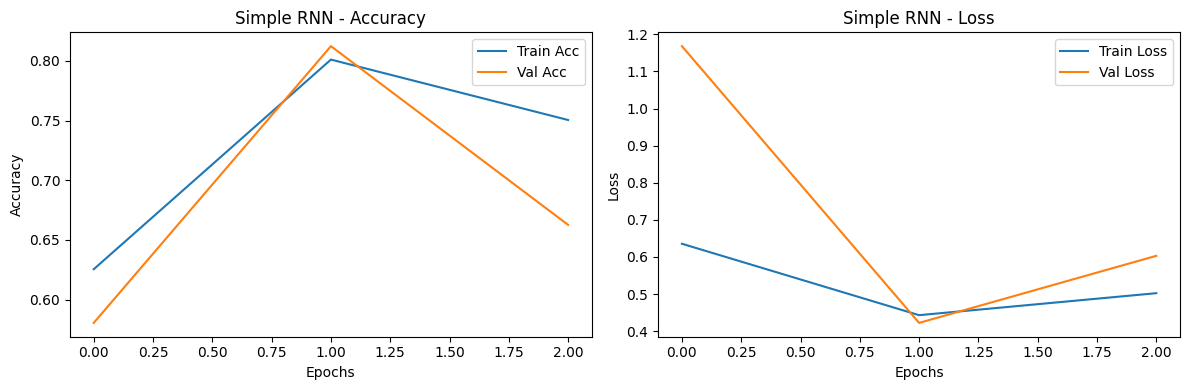

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


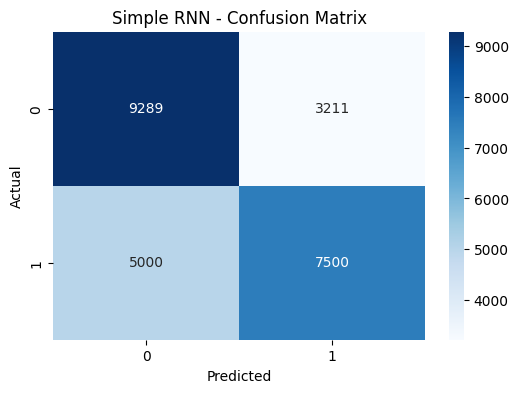


Simple RNN - Classification Report:

              precision    recall  f1-score   support

           0     0.6501    0.7431    0.6935     12500
           1     0.7002    0.6000    0.6462     12500

    accuracy                         0.6716     25000
   macro avg     0.6751    0.6716    0.6699     25000
weighted avg     0.6751    0.6716    0.6699     25000



In [11]:
# Evaluate Simple RNN
evaluate_and_plot(model_rnn, x_test, y_test, history_rnn, "Simple RNN")


Bidirectional RNN - Test Accuracy: 0.8188


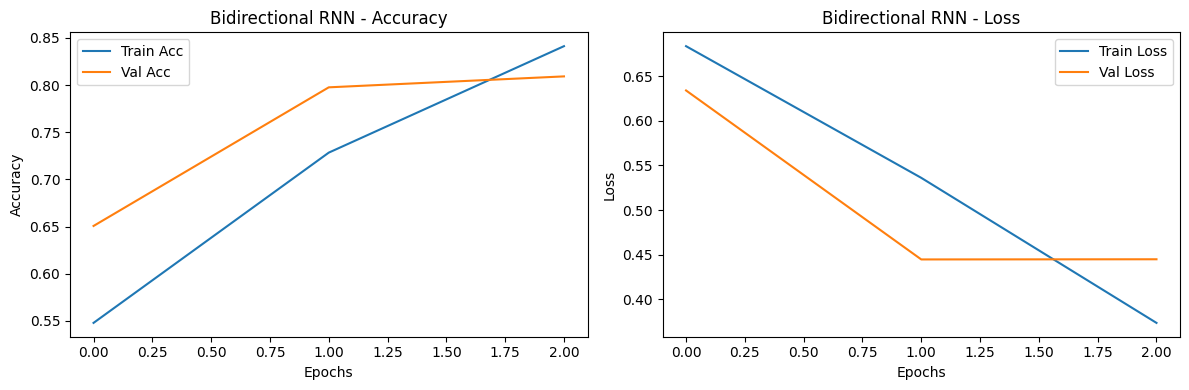

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


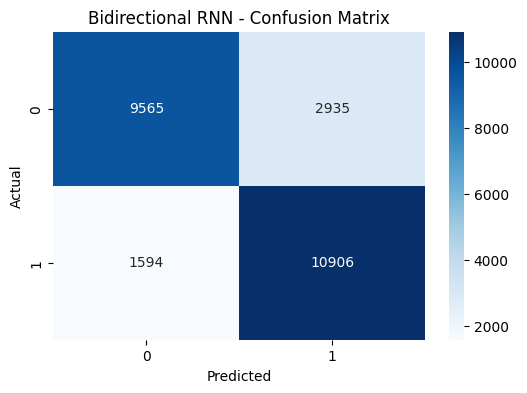


Bidirectional RNN - Classification Report:

              precision    recall  f1-score   support

           0     0.8572    0.7652    0.8086     12500
           1     0.7879    0.8725    0.8281     12500

    accuracy                         0.8188     25000
   macro avg     0.8226    0.8188    0.8183     25000
weighted avg     0.8226    0.8188    0.8183     25000



In [12]:
# Evaluate Bidirectional RNN
evaluate_and_plot(model_birnn, x_test, y_test, history_birnn, "Bidirectional RNN")